# Dissertation
## Chapter 2 
### Cyclic Changing Environments - Phylogenetic Depth (Flame Graphs)

In [2]:
import sys
import glob
import collections

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.20.3'

In [3]:
## Dataset-specific -- edit me
data_number = "082"
data_name = "Final"

treatments = collections.OrderedDict()
treatments['control'] = 'control'
treatments['noreward'] = 'benign'
treatments['punish'] = 'harsh'

## basic config
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/"
base_path = "/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/"
raw_data_directory = "raw_data"
analysis_directory = "intermediate_data"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + raw_data_directory + "/" + data_directory
analysis_path = base_path + analysis_directory

print (data_path)
print (analysis_path)



/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final
/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data


In [4]:
%cd {data_path}
%mkdir {analysis_path}
%cd {analysis_path}
%pwd


/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final
mkdir: cannot create directory ‘/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data’: File exists
/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data


u'/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/intermediate_data'

In [5]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

# Phylogenetic Depth - Flame Graphs

#### Generated the distances on the hpcc
```bash
caninoko@dev-intel07:/mnt/scratch/caninoko/082/populations$ for i in c*_i*_??????; do echo $i; if [ ! -e $i/phylo_depth_abundances_over_time.csv ] ; then cd $i; python ~/scripts/population_phylogenetic_distance_over_time.py -v -o phylo_depth_abundances_over_time.csv detail-?.spop* detail-??.spop* detail-???.spop* detail-????.spop* detail-?????.spop* detail-??????.spop* ; cd ../; else ; echo "Skipping." ; fi ; done
```

#### Actually produce the flame graphs
```bash
rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/control_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --title "Control Treatment" --most_recent_coalescence="../../INTERTWINED/control_intertwined_820001/data/stats.dat,10" --show phylo_depth_abundance_over_time__coalescence__control__forposter.png phylo_depth_abundances_over_time.csv

rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/noreward_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --title "Benign Treatment" --most_recent_coalescence="../../INTERTWINED/noreward_intertwined_820001/data/stats.dat,10" --show phylo_depth_abundance_over_time__coalescence__benign__forposter.png phylo_depth_abundances_over_time.csv

rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/populations/punish_intertwined_820001$ python ../../../../../scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --title "Hostile Treatment" --most_recent_coalescence="../../INTERTWINED/punish_intertwined_820001/data/stats.dat,10" --show phylo_depth_abundance_over_time__coalescence__hostile__forposter.png phylo_depth_abundances_over_time.csv
```

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --xsize 1950 --ysize 600 --ylabel " " --xlabel " " --most_recent_coalescence="/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/control_intertwined_820001/data/stats.dat,10" --title "Phylogenetic Depth and Last Coalescence

Control (Static) Environment" control__phylodepth_with_coalescense.png /home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/populations/control_intertwined_820001//phylo_depth_abundances_over_time.csv


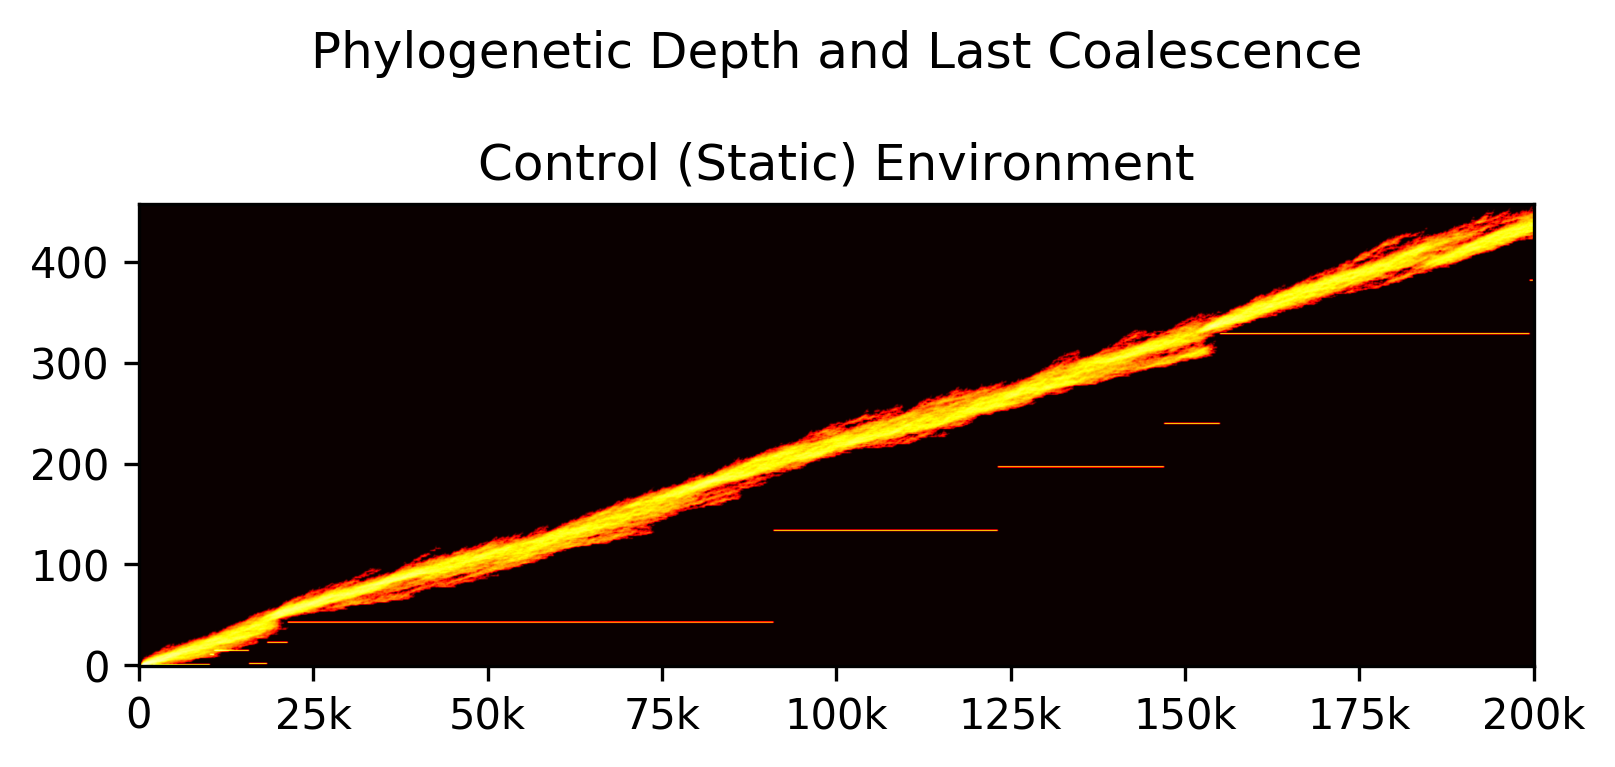

In [12]:
datafiles = ""
subdir = "/populations/control_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_phylogenetic_depth_abundances_over_time.py '
#script += '--horizontal '
script += '--xsize 1950 --ysize 600 '
#script += '--legend '
script += '--ylabel " " '
script += '--xlabel " " '
#script += '--ylim 1000 '
script += '--most_recent_coalescence="' + data_path + '/control_intertwined_820001/data/stats.dat,10" '
script += '--title "Phylogenetic Depth and Last Coalescence\n\nControl (Static) Environment" '
script += 'control__phylodepth_with_coalescense.png '
script += data_path + subdir + "/phylo_depth_abundances_over_time.csv" 



print (script)

!python2 $script

ipyImage('control__phylodepth_with_coalescense.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --xsize 1950 --ysize 600 --ylabel "Steps from Ancestor
(Phylogenetic Depth)" --xlabel " " --most_recent_coalescence="/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/noreward_intertwined_820001/data/stats.dat,10" --title "Benign Environment" benign__phylodepth_with_coalescense.png /home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/populations/noreward_intertwined_820001/phylo_depth_abundances_over_time.csv


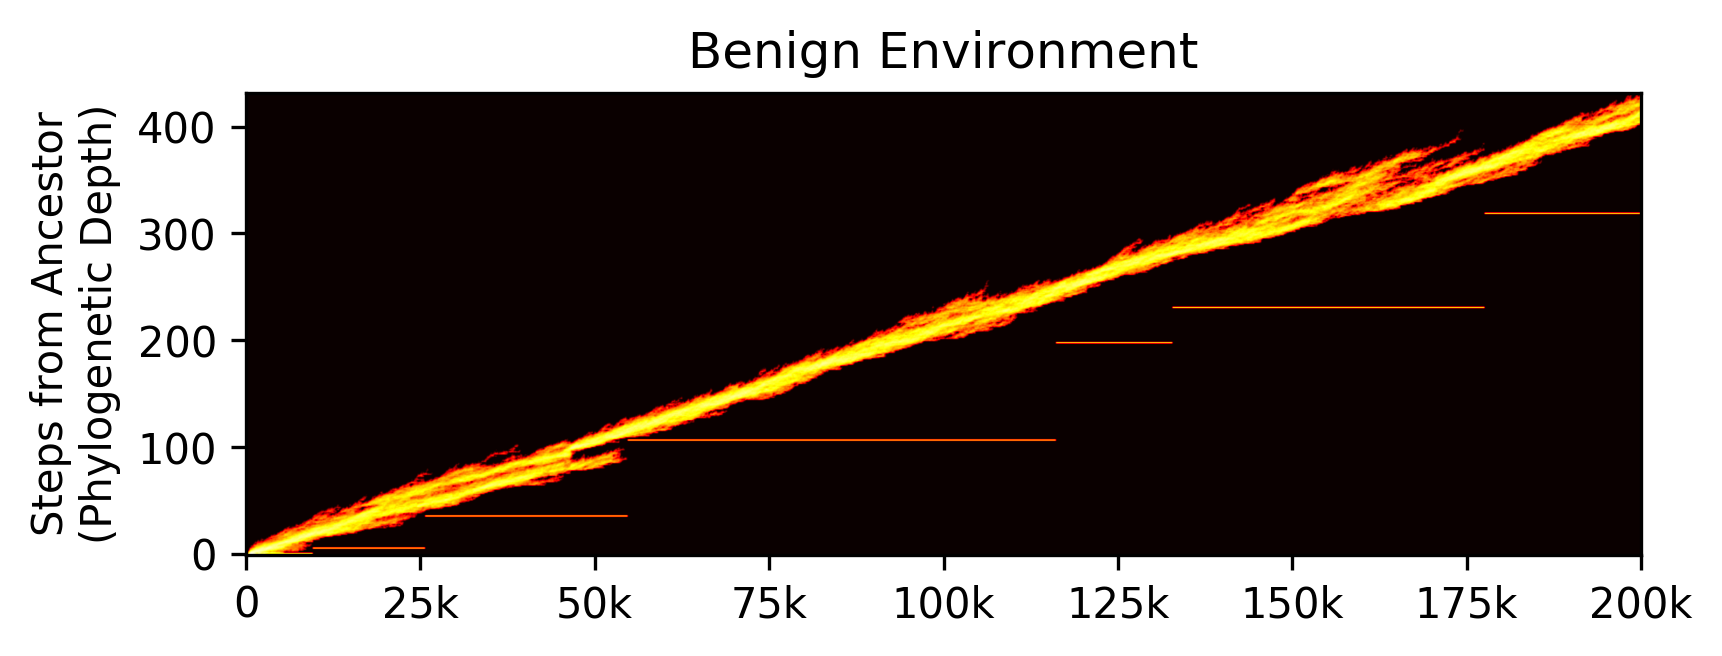

In [13]:
datafiles = ""
subdir = "/populations/noreward_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_phylogenetic_depth_abundances_over_time.py '
#script += '--horizontal '
script += '--xsize 1950 --ysize 600 '
#script += '--legend '
script += '--ylabel "Steps from Ancestor\n(Phylogenetic Depth)" '
script += '--xlabel " " '
#script += '--ylim 1000 '
script += '--most_recent_coalescence="' + data_path + '/noreward_intertwined_820001/data/stats.dat,10" '
script += '--title "Benign Environment" '
script += 'benign__phylodepth_with_coalescense.png '
script += data_path + subdir + "phylo_depth_abundances_over_time.csv" 



print (script)

!python2 $script

ipyImage('benign__phylodepth_with_coalescense.png') 

~/Dropbox/School_Docs/Research/research_scripts/graph_generation/plot_phylogenetic_depth_abundances_over_time.py --xsize 1950 --ysize 1000 --ylabel " " --xlabel "Time (Updates)" --most_recent_coalescence="/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/punish_intertwined_820001/data/stats.dat,10" --title "Harsh Environment" harsh__phylodepth_with_coalescense.png /home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_2_-_CE/data/raw_data/082_Final/populations/punish_intertwined_820001/phylo_depth_abundances_over_time.csv


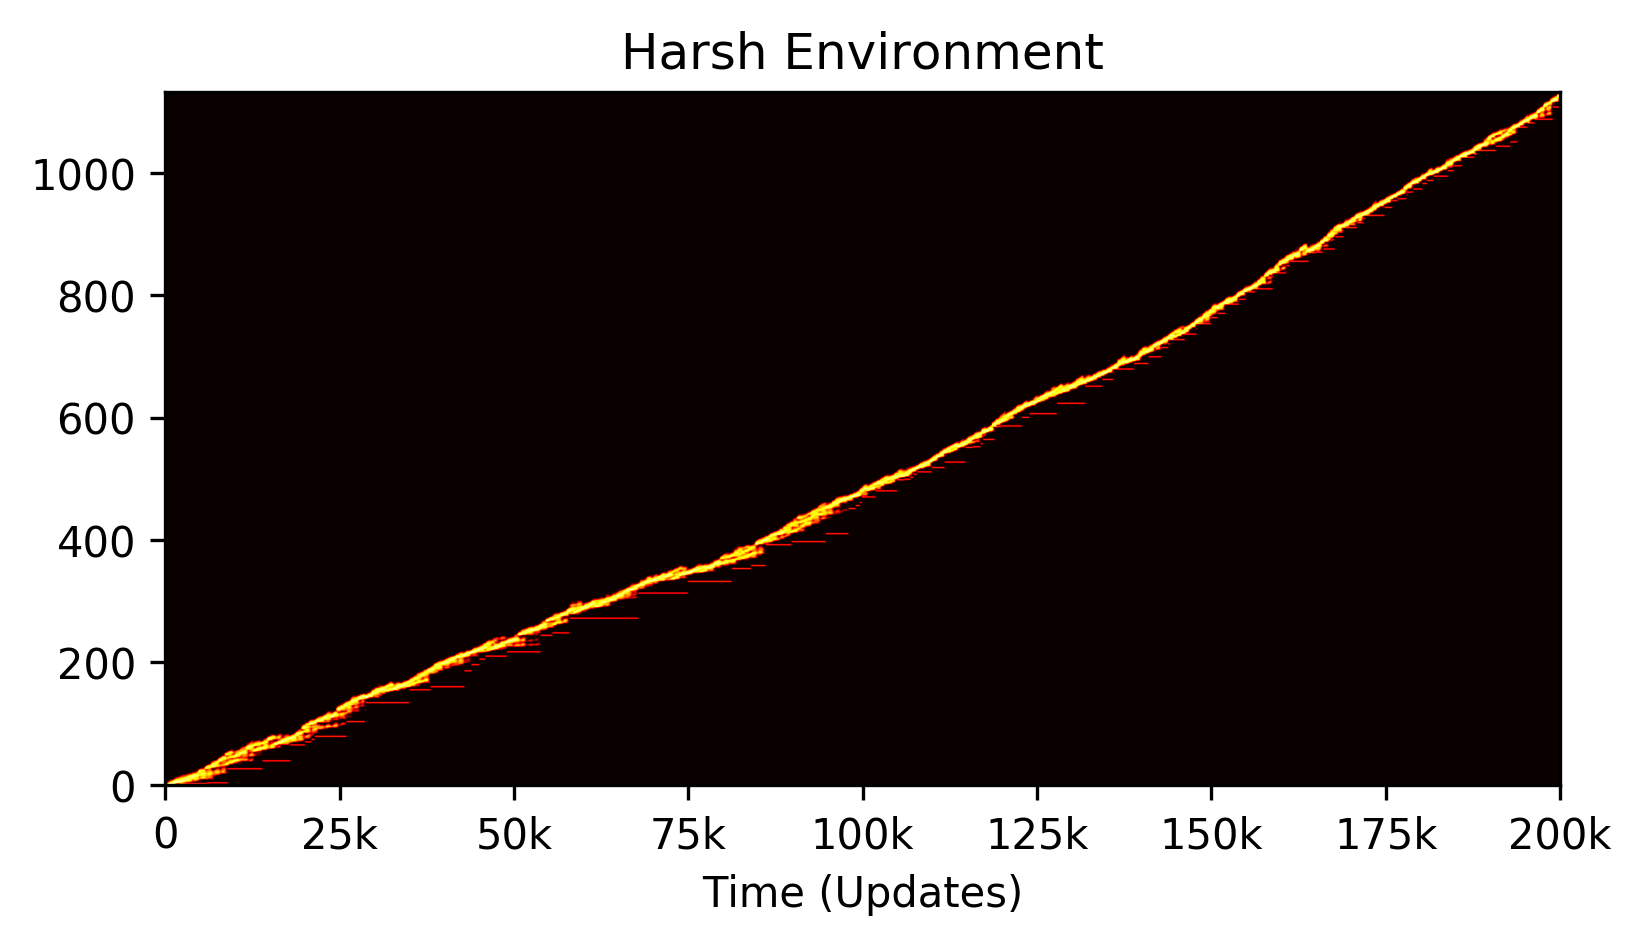

In [14]:
datafiles = ""
subdir = "/populations/punish_intertwined_820001/"

script = scripts_path + 'graph_generation/plot_phylogenetic_depth_abundances_over_time.py '
#script += '--horizontal '
#script += '--xsize 1300 --ysize 800 '
script += '--xsize 1950 --ysize 1000 '
#script += '--legend '
script += '--ylabel " " '
script += '--xlabel "Time (Updates)" '
#script += '--ylim 1000 '
script += '--most_recent_coalescence="' + data_path + '/punish_intertwined_820001/data/stats.dat,10" '
script += '--title "Harsh Environment" '
script += 'harsh__phylodepth_with_coalescense.png '
script += data_path + subdir + "phylo_depth_abundances_over_time.csv" 



print (script)

!python2 $script

ipyImage('harsh__phylodepth_with_coalescense.png') 